# EN3160 Assignment 1 on Intensity Transformations and Neighborhood Filtering

Instructed by Dr. Ranga Rodrigo

Done by: Warren Jayakumar

### Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [20]:
ASSET_FOLDER = 'a1images/'

### Implementing an Intensity Transformation Function

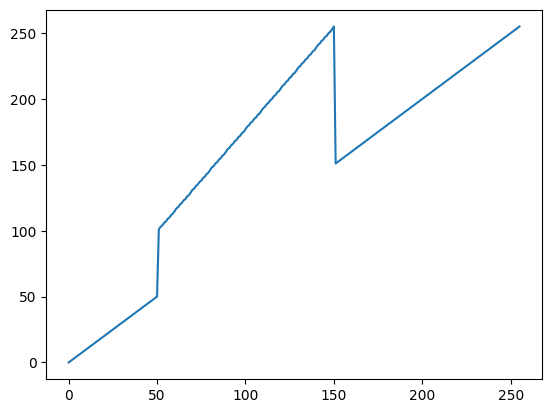

In [26]:
# Create the Function
discontinuities = np.array([(50, 50), (50, 100), (150, 255), (150, 150), (255, 255)])

# Segment-wise interpolation
t1 = np.linspace(0, discontinuities[0,1], discontinuities[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(discontinuities[0,1], discontinuities[1,1], discontinuities[1,0] - discontinuities[0,0] + 1).astype('uint8')
t3 = np.linspace(discontinuities[1,1], discontinuities[2,1], discontinuities[2,0] - discontinuities[1,0] + 1).astype('uint8')
t4 = np.linspace(discontinuities[2,1], discontinuities[3,1], discontinuities[3,0] - discontinuities[2,0] + 1).astype('uint8')
t5 = np.linspace(discontinuities[3,1], discontinuities[4,1], discontinuities[4,0] - discontinuities[3,0] + 1).astype('uint8')

# Concatenate all the segments
transform = np.concatenate([t1, t2[1:], t3[1:], t4[1:], t5[1:]])

plt.plot(transform)
plt.show()

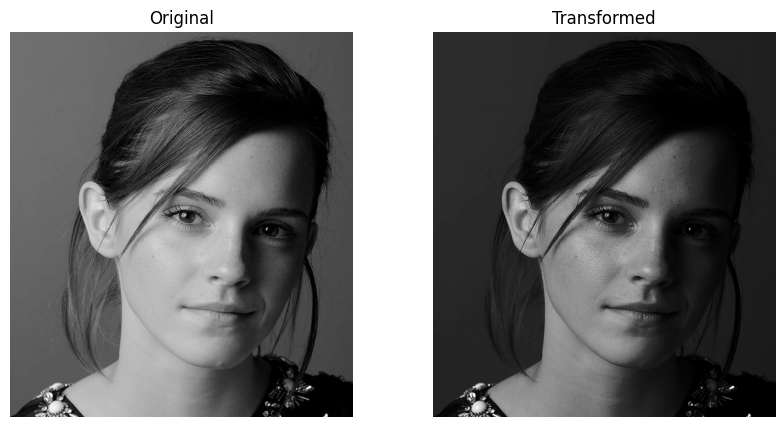

In [45]:
## Apply the transformation to the image
emma_watson = cv.imread(ASSET_FOLDER + 'emma.jpg', cv.IMREAD_GRAYSCALE)
emma_watson_transformed = cv.LUT(emma_watson, transform)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(emma_watson, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')
axes[1].imshow(emma_watson_transformed, cmap='gray')
axes[1].set_title('Transformed')
axes[1].axis('off')
plt.show()

### Enhancing White Matter and Grey Matter in an Image

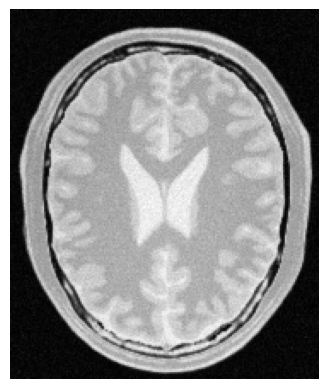

In [46]:
# View the original image
brain_image = ASSET_FOLDER + 'brain_proton_density_slice.png'
brain = cv.imread(brain_image, cv.IMREAD_GRAYSCALE)
plt.imshow(brain, cmap='gray')
plt.axis(False)
plt.show()

The white matter is brighter than the surrounding areas. Therefore, in order to enhance these areas, more detail can be brought out by increasing contrast in the brighter areas of the image. When considering the greymatter, it is darker than the white matter. Therefore, in order to enhance these areas, more detail can be brought out by increasing contrast in the medium intensity areas of the image.

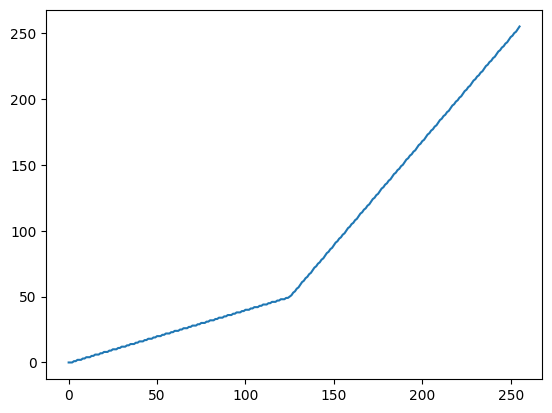

In [53]:
# Create the Function
discontinuities = np.array([(125, 50), (255,255)])

# Segment-wise interpolation
t1 = np.linspace(0, discontinuities[0,1], discontinuities[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(discontinuities[0,1], discontinuities[1,1], discontinuities[1,0] - discontinuities[0,0] + 1).astype('uint8')

# Concatenate all the segments
white_transform = np.concatenate([t1, t2[1:]])
plt.plot(white_transform)
plt.show()

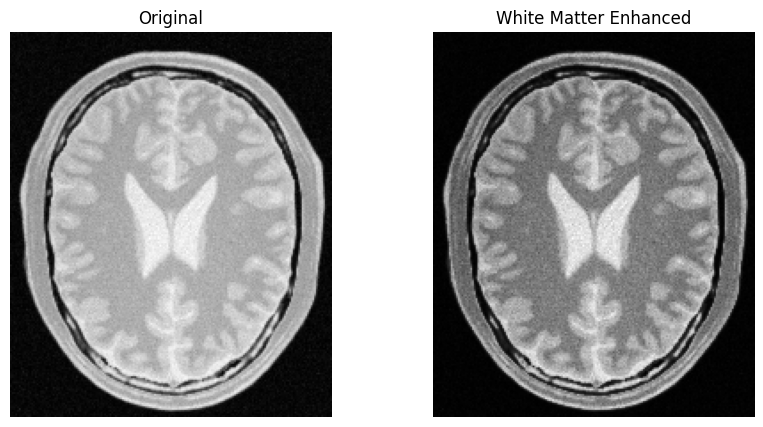

In [42]:
whitematter_enhanced = cv.LUT(brain, white_transform)
plot, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(brain, cmap='gray')
axes[0].set_title('Original')
axes[0].axis(False)
axes[1].imshow(whitematter_enhanced, cmap='gray')
axes[1].set_title('White Matter Enhanced')
axes[1].axis(False)
plt.show()

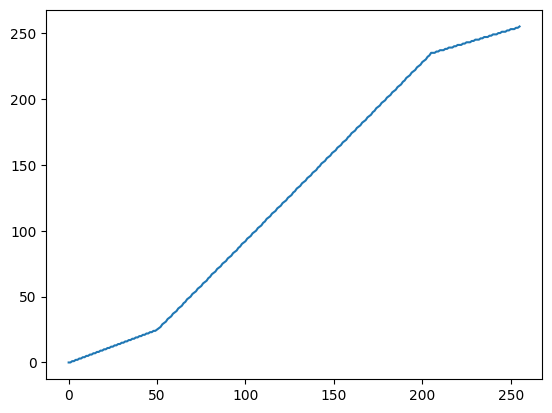

In [57]:
# Create the Function
discontinuities = np.array([(50, 25), (205,235), (255,255)])

# Segment-wise interpolation
t1 = np.linspace(0, discontinuities[0,1], discontinuities[0,0] + 1 - 0).astype('uint8')
t2 = np.linspace(discontinuities[0,1], discontinuities[1,1], discontinuities[1,0] - discontinuities[0,0] + 1).astype('uint8')
t3 = np.linspace(discontinuities[1,1], discontinuities[2,1], discontinuities[2,0] - discontinuities[1,0] + 1).astype('uint8')

# Concatenate all the segments
grey_transform = np.concatenate([t1, t2[1:], t3[1:]])
plt.plot(grey_transform)
plt.show()

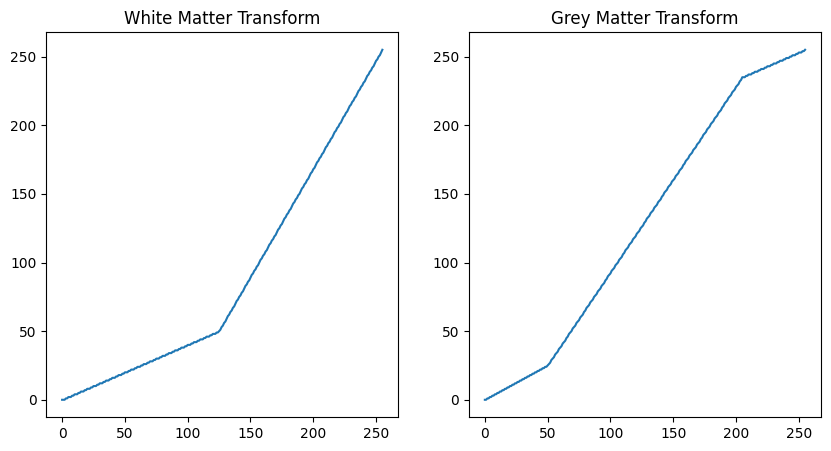

In [84]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].plot(white_transform)
axes[0].set_title('White Matter Transform')
axes[1].plot(grey_transform)
axes[1].set_title('Grey Matter Transform')
plt.show()

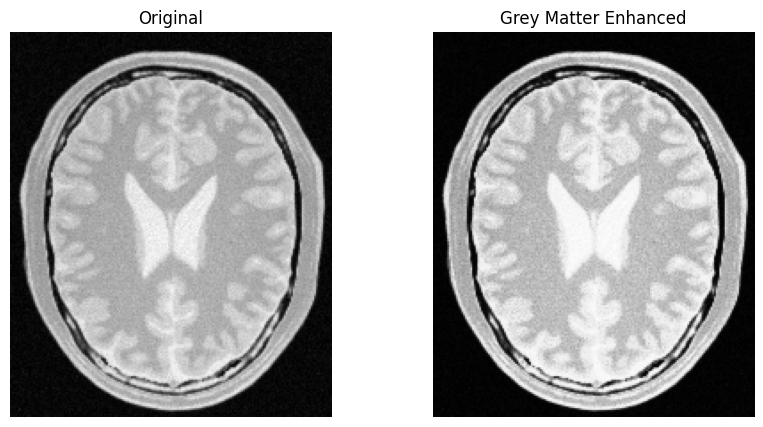

In [58]:
grey_matter_enhanced = cv.LUT(brain, grey_transform)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(brain, cmap='gray')
axes[0].set_title('Original')
axes[0].axis(False)
axes[1].imshow(grey_matter_enhanced, cmap='gray')
axes[1].set_title('Grey Matter Enhanced')
axes[1].axis(False)
plt.show()

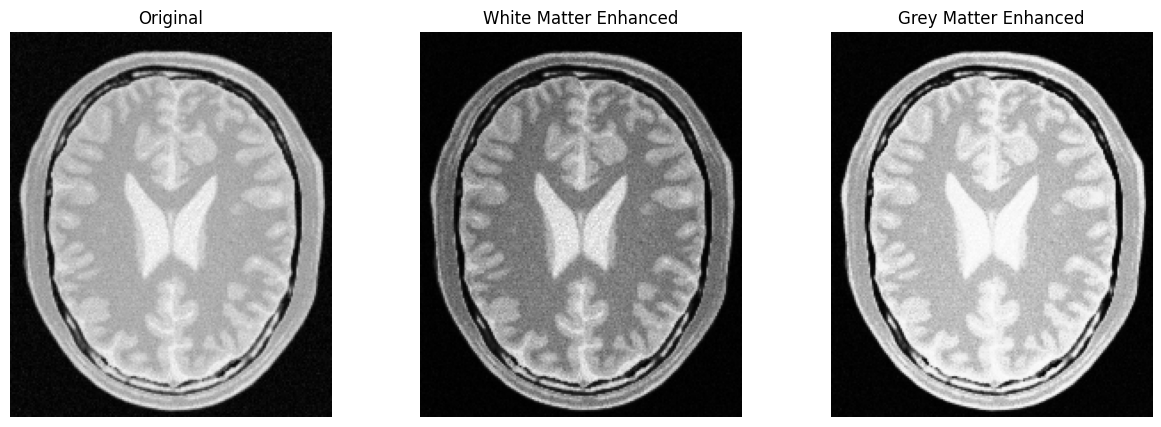

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(brain, cmap='gray')
axes[0].set_title('Original')
axes[0].axis(False)
axes[1].imshow(whitematter_enhanced, cmap='gray')
axes[1].set_title('White Matter Enhanced')
axes[1].axis(False)
axes[2].imshow(grey_matter_enhanced, cmap='gray')
axes[2].set_title('Grey Matter Enhanced')
axes[2].axis(False)
plt.show()

### Gamma Correction

In this section, we consider an image in the L,A,B colour space and gamma correct the L channel. In order to ontain a suitable $\gamma$ value, we will plot the histogram of the L channel and determine a value for $\gamma$

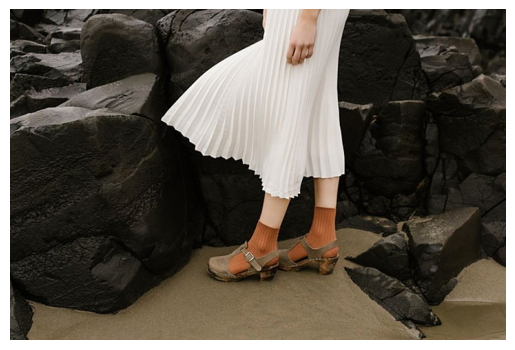

In [61]:
# View the image
gamma_image = ASSET_FOLDER + 'highlights_and_shadows.jpg'
gamma_image = cv.imread(gamma_image)
plt.imshow(cv.cvtColor(gamma_image, cv.COLOR_BGR2RGB))
plt.axis(False)
plt.show()

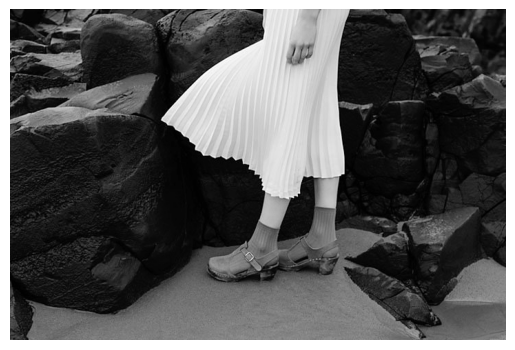

In [79]:
# View the L channel
lab_image = cv.cvtColor(gamma_image, cv.COLOR_BGR2LAB)
l, a, b = cv.split(lab_image)
plt.imshow(l, cmap='gray')
plt.axis(False)
plt.show()

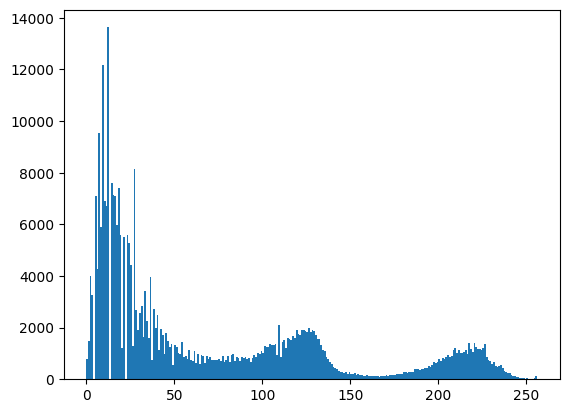

In [80]:
# View the histogram
plt.hist(l.ravel(), bins=256, range=[0, 256])
plt.show()

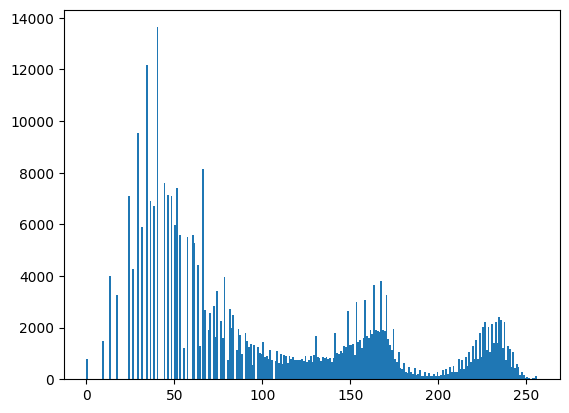

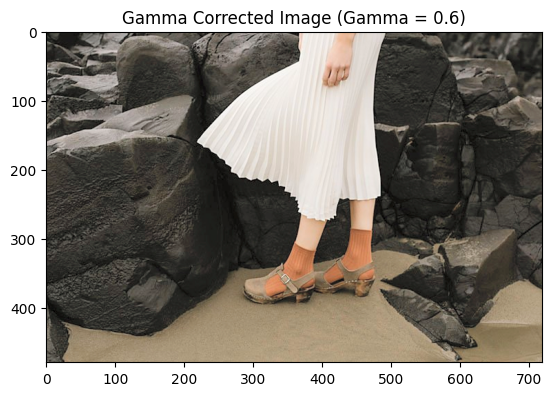

In [81]:
# Since most values of L channel are concentrated in the lower range, we can apply gamma correction to enhance the image such that gamma is less than 1
gamma = 0.6
gamma_transform = np.array([(i / 255.0) ** gamma * 255 for i in np.arange(0,256)], dtype = np.uint8)
l_gamma_corrected = cv.LUT(l, gamma_transform)

# Merge back the corrected L channel with original A and B channels
lab_corrected = cv.merge([l_gamma_corrected, a, b])
plt.hist(l_gamma_corrected.ravel(), bins=256, range=[0, 256])
plt.show()

# Convert back to BGR (or RGB)
image_corrected = cv.cvtColor(lab_corrected, cv.COLOR_LAB2BGR)
plt.imshow(cv.cvtColor(image_corrected, cv.COLOR_BGR2RGB))
plt.title(f'Gamma Corrected Image (Gamma = {gamma})')
plt.show()

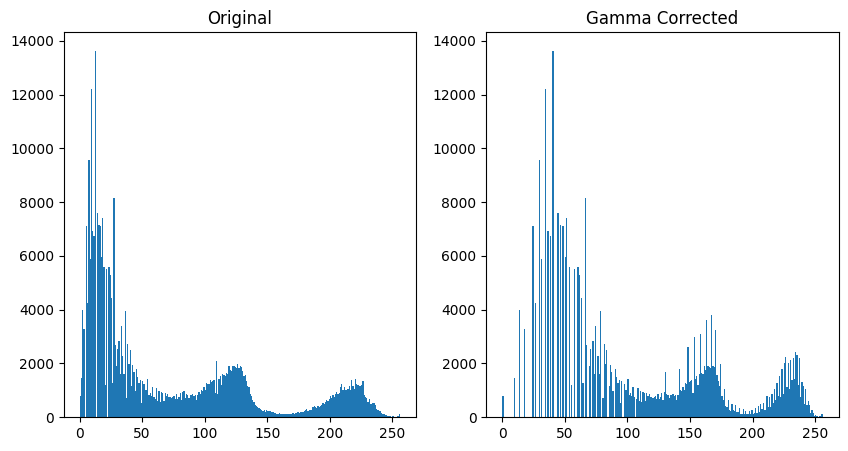

In [83]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].hist(l.ravel(), bins=256, range=[0, 256])
axes[0].set_title('Original')
axes[1].hist(l_gamma_corrected.ravel(), bins=256, range=[0, 256])
axes[1].set_title('Gamma Corrected')
plt.show()

### Vibrance Enhancement

In [ ]:
vibrance_image = ASSET_FOLDER + 'spider.jpg'